In [11]:
import cuml
import cudf
import os
import time

In [2]:
!pip install plotly

     |████████████████████████████████| 20.6 MB 3.8 MB/s eta 0:00:01


In [3]:
pip install -U kaleido

     |████████████████████████████████| 79.9 MB 792 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [12]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [13]:
from cuml import DBSCAN as cumlDBSCAN
from cuml.cluster import KMeans as cuKMeans
from cuml.decomposition import PCA
import cupy

In [5]:
import plotly.offline as pyo
pyo.init_notebook_mode()
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py
import plotly.express as px

ModuleNotFoundError: No module named 'plotly'

In [14]:
!python --version

Python 3.7.10


In [15]:
!pwd

/rapids/notebooks/host


In [16]:
data_dir='/rapids/notebooks/host/'

In [17]:
df = cudf.read_csv(os.path.join(data_dir,'representation_df_10000.csv'), nrows=500000)

MemoryError: std::bad_alloc: CUDA error at: /opt/conda/envs/rapids/include/rmm/mr/device/cuda_memory_resource.hpp:69: cudaErrorMemoryAllocation out of memory

In [ ]:
df = df.iloc[:,1:]

In [ ]:
df.head(1)

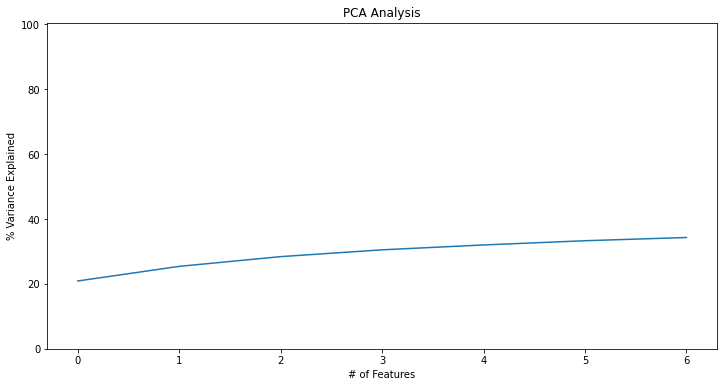

In [16]:
pca = PCA(n_components=7)
pca.fit(df)
variance = pca.explained_variance_ratio_ 
var=np.cumsum(np.round(variance, 3)*100)
plt.figure(figsize=(12,6))
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(0,100.5)

numpy_var = cupy.asnumpy(var.values)

plt.plot(numpy_var)

In [21]:
pca = PCA(n_components=3)
pca.fit(df)
pca_df = pca.transform(df)

print(pca.explained_variance_ratio_)

0    0.20902
1    0.04513
2    0.02963
dtype: float64


In [23]:
%%time
n_clusters = 30
random_state = 0

kmeans_cuml = cuKMeans(init="k-means||",
                       n_clusters=n_clusters,
                       oversampling_factor=400,
                       random_state=random_state)

trained_kmeans = kmeans_cuml.fit(pca_df)

CPU times: user 16 s, sys: 0 ns, total: 16 s
Wall time: 16 s


/opt/conda/envs/rapids/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:>

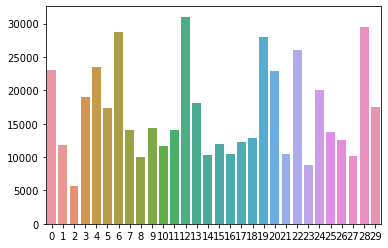

In [24]:
df_labels = pd.DataFrame(trained_kmeans.labels_.to_pandas())
rating_count = df_labels[0].value_counts()

x = rating_count.index
y = rating_count.values

sns.barplot(x, y)

In [25]:
%%time
n_clusters = 30
random_state = 0

kmeans_cuml = cuKMeans(init="k-means||",
                       n_clusters=n_clusters,
                       oversampling_factor=400,
                       random_state=random_state)

trained_kmeans = kmeans_cuml.fit(df)

CPU times: user 23min 39s, sys: 664 ms, total: 23min 39s
Wall time: 23min 38s


In [10]:
df_labels = pd.DataFrame(trained_kmeans.labels_.to_pandas())
rating_count = df_labels[0].value_counts()

x = rating_count.index
y = rating_count.values

sns.barplot(x, y)

NameError: name 'trained_kmeans' is not defined

NameError: name 'x' is not defined